# Language detection

## Importing basic libraries and dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Language Detection.csv')

In [3]:
df.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [4]:
df.tail()

,Text,Language
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada
10336,ಟೆರ್ರಿ ನೀವು ನಿಜವಾಗಿಯೂ ಆ ದೇವದೂತನಂತೆ ಸ್ವಲ್ಪ ಕಾಣು...,Kannada


## Understanding the dataset

In [5]:
df.shape

(10337, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10337 entries, 0 to 10336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      10337 non-null  object
 1   Language  10337 non-null  object
dtypes: object(2)
memory usage: 161.6+ KB


In [7]:
df.isnull().sum()

Text        0
Language    0
dtype: int64

In [8]:
df[df.duplicated()] #creating dataframe for duplicate rows(i.e... repeated rows)

,Text,Language
1141,i'm sorry.,English
1180,oh my god.,English
1196,i'm sorry.,English
1724,എന്നോട് ക്ഷമിക്കൂ.,Malayalam
1767,ഓ എന്റെ ദൈവമേ.,Malayalam
...,...,...
9706,Ach du lieber Gott.,German
9726,Es tut mir Leid.,German
10081,ನನ್ನನ್ನು ಕ್ಷಮಿಸು.,Kannada
10125,ಓ ದೇವರೇ.,Kannada


In [9]:
len(df[df.duplicated()])

66

In [10]:
#we need to drop those duplicate rows
df.drop(df[df.duplicated()].index, axis = 0, inplace = True)

In [11]:
df.shape

(10271, 2)

Numbers of rows are decreased so we can see that those duplicate rows are dropped

In [12]:
df["Language"].nunique() #to find no.of unique rows in that particular column

17

In [13]:
df['Language'].value_counts() #particular row count

English       1382
French        1007
Spanish        816
Portugeese     736
Italian        694
Russian        688
Sweedish       673
Malayalam      591
Dutch          542
Arabic         532
Turkish        471
German         465
Tamil          464
Danish         424
Kannada        366
Greek          358
Hindi           62
Name: Language, dtype: int64

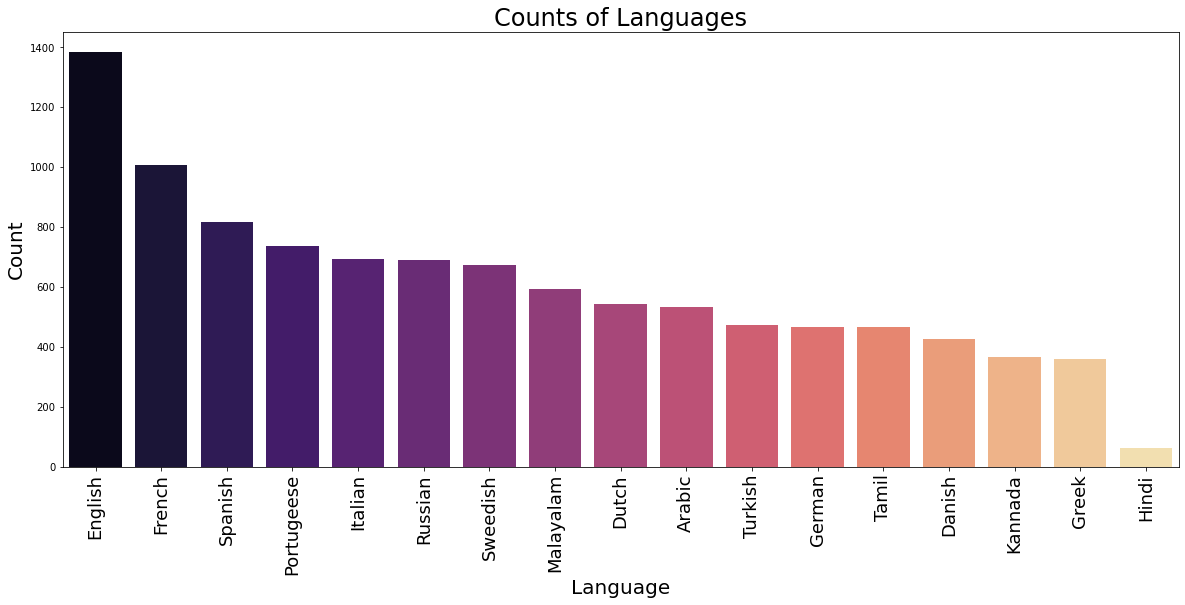

In [14]:
plt.figure(figsize=(20,8))
sns.countplot(x= 'Language', data= df, order= df['Language'].value_counts().index, palette= 'magma')
plt.title('Counts of Languages', fontsize=24)
plt.xlabel("Language",fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.xticks(size= 18, rotation=90) 
plt.show()

In [16]:
language= df['Language'].value_counts().reset_index()
language

,index,Language
0,English,1382
1,French,1007
2,Spanish,816
3,Portugeese,736
4,Italian,694
5,Russian,688
6,Sweedish,673
7,Malayalam,591
8,Dutch,542
9,Arabic,532


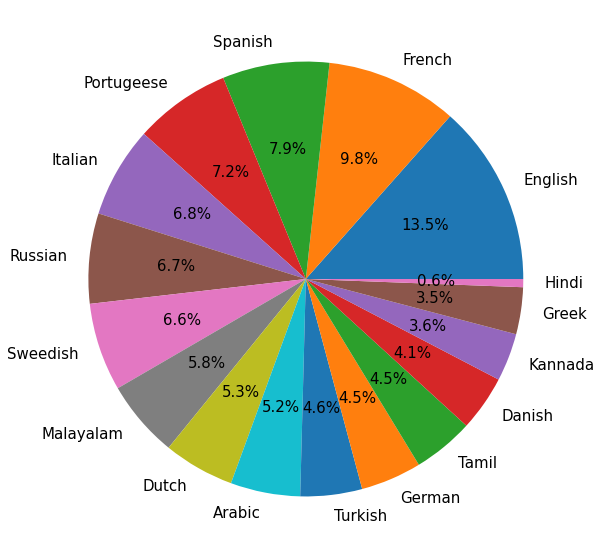

In [17]:
plt.figure(figsize=(10,10))

#create pie chart
labels= language['index']

plt.pie(language["Language"], labels= labels, autopct='%.1f%%', textprops={'fontsize': 15})

plt.show()

## Text Preprocessing

In [18]:
#new column for cleaned text
df1 = df.copy()
df['cleaned_text'] = ""
df1

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada


This is a dataset created using scraping the Wikipedia, so it contains many unwanted symbols, numbers which will affect the quality of our model. So we should perform text preprocessing techniques.

In [19]:
import re
def clean_function(Text):
    # removing the symbols and numbers
    Text = re.sub(r'[\([{})\]!@#$,"%^*?:;~`0-9]', ' ', Text)
    
    # converting the text to lower case
    Text = Text.lower()
    Text = re.sub('http\S+\s*', ' ', Text)  # remove URLs
    Text = re.sub('RT|cc', ' ', Text)  # remove RT and cc
    Text = re.sub('#\S+', '', Text)  # remove hashtags
    Text = re.sub('@\S+', '  ', Text)  # remove mentions
    Text = re.sub('\s+', ' ', Text)  # remove extra whitespace
    
    return Text

In [20]:
df1['cleaned_Text'] = df1['Text'].apply(lambda x: clean_function(x))
df1

,Text,Language,cleaned_Text
0,"Nature, in the broadest sense, is the natural...",English,nature in the broadest sense is the natural p...
1,"""Nature"" can refer to the phenomena of the phy...",English,nature can refer to the phenomena of the phys...
2,"The study of nature is a large, if not the onl...",English,the study of nature is a large if not the only...
3,"Although humans are part of nature, human acti...",English,although humans are part of nature human activ...
4,[1] The word nature is borrowed from the Old F...,English,the word nature is borrowed from the old fren...
...,...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...


## Separating dependent & Independent features

In [21]:
X= df1["cleaned_Text"]
y= df1["Language"]

## Label encoding

Our output variable, the name of languages is a categorical variable. For training the model we should have to convert it into a numerical form, so we are performing label encoding on that output variable. For this process, we are importing LabelEncoder from sklearn.

In [22]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
y = l.fit_transform(y)

## Bag of words

As we all know that, not only the output feature but also the input feature should be of the numerical form. So we are converting text into numerical form by creating a Bag of Words model using CountVectorizer.

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
CV = CountVectorizer()
X = CV.fit_transform(X).toarray()

In [25]:
X.shape

(10271, 39370)

## Splitting training and testing data

We preprocessed our input and output variable. The next step is to create the training set, for training the model and test set, for evaluating the test set. For this process, we are using a train test split.

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3, random_state = 0)

## Building model and training

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

models = {
    'K-Nearest Neighbors' : KNeighborsClassifier(),
    'Random Forest' : RandomForestClassifier(),
    'MNB' : MultinomialNB()    
}

In [29]:
for name, model in models.items():
    print(f'{name} training started...')
    model.fit(Xtrain, ytrain)
    print(f'{name} trained')

K-Nearest Neighbors training started...
K-Nearest Neighbors trained
Random Forest training started...
Random Forest trained
MNB training started...
MNB trained


## Model evaluation

In [30]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix as CM
from sklearn.metrics import classification_report

In [31]:
for name in models:
    acc_score= round(accuracy_score(ytest, models.get(name).predict(Xtest)), 3)
    print(f'{name} accuracy score :  {acc_score}')

K-Nearest Neighbors accuracy score :  0.526
Random Forest accuracy score :  0.931
MNB accuracy score :  0.977


In [32]:
for name in models:
    print(f'{name} classification report')
    print("--------------------------------------------------------------")
    print(classification_report(ytest, models.get(name).predict(Xtest)))
    print("****************************************************************")
    print(" ")

K-Nearest Neighbors classification report
--------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.34      0.50       169
           1       0.84      0.59      0.69       113
           2       0.87      0.52      0.65       156
           3       0.98      0.54      0.70       406
           4       0.82      0.61      0.70       291
           5       0.88      0.47      0.61       136
           6       1.00      0.52      0.68       106
           7       1.00      0.62      0.77        24
           8       0.96      0.48      0.64       237
           9       0.10      0.96      0.19       109
          10       0.56      0.71      0.62       173
          11       0.89      0.51      0.65       231
          12       0.60      0.33      0.43       196
          13       0.84      0.49      0.62       254
          14       0.98      0.43      0.60       215
          15       0.27      0

K-Nearest Neighbors confusion matrix


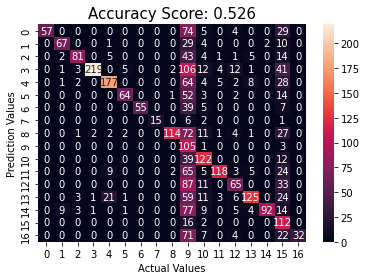

****************************************************************
 
Random Forest confusion matrix


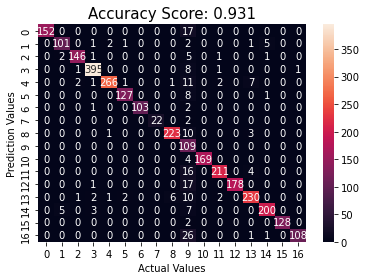

****************************************************************
 
MNB confusion matrix


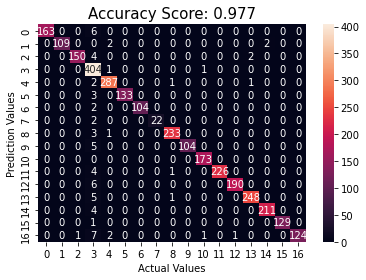

****************************************************************
 


In [33]:
for name in models:
    print(f'{name} confusion matrix')
    score = round(accuracy_score(ytest, models.get(name).predict(Xtest)), 3)
    sns.heatmap(CM(ytest, models.get(name).predict(Xtest)), annot=True, fmt=".0f")
    plt.xlabel('Actual Values')
    plt.ylabel('Prediction Values')
    plt.title('Accuracy Score: {0}'.format(score), size = 15)
    plt.show()
    print("****************************************************************")
    print(" ")

## Predictions

In [34]:
def prediction(text):
    x= CV.transform([text]).toarray()
    lang= model.predict(x)
    lang= l.inverse_transform(lang)
    print("This word/sentence contains {} word(s).".format(lang[0]))

In [35]:
prediction("Your memory improves as you learn a language.")

This word/sentence contains English word(s).


In [36]:
prediction("Η μνήμη σας βελτιώνεται καθώς μαθαίνετε μια γλώσσα.")

This word/sentence contains Greek word(s).


In [37]:
prediction("भाषा का पता लगाने")

This word/sentence contains Hindi word(s).


In [39]:
prediction("Rilevamento della lingua")

This word/sentence contains Italian word(s).


In [40]:
prediction("كشف اللغة")

This word/sentence contains Arabic word(s).
